In [1]:
# import the usual suspects ...
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, plot_confusion_matrix, roc_auc_score, balanced_accuracy_score, mean_squared_error, r2_score
import itertools
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(123)
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

D:\Program Files\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\Program Files\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\Program Files\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from sklearn.metrics import classification_report,plot_confusion_matrix,balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, plot_tree

In [3]:
# Train/Test Split
X = pd.read_csv("X_re.csv")
y = pd.read_csv("y_re.csv")

In [4]:
from sklearn.model_selection import train_test_split

# split our data
x_train_cla, x_test_cla, y_train_cla, y_test_cla = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [5]:
# Scaling X using StandardScaler
# Only fit training data to avoid data leakage
scaler = StandardScaler()
x_train_cla = pd.DataFrame(scaler.fit_transform(x_train_cla), columns=list(x_train_cla.columns))
x_test_cla = pd.DataFrame(scaler.transform(x_test_cla), columns=list(x_test_cla.columns))
x_train_cla.head()

,Engine_Capacity_.CC.,Engine_Capacity_.CC..1,Vehicle_Type,Vehicle_Manoeuvre,Vehicle_Direction_To,Vehicle_Direction_From,Age_Band_of_Casualty,Day_of_Week,Year,Engine_Capacity_.CC..2,Engine_Capacity_.CC..3,Local_Authority_(District),Speed_limit_2,Speed_limit_3,Speed_limit_4,Daytime_2,Daytime_3,Daytime_4,Daytime_5,Number_of_Casualties_2,Number_of_Casualties_3,Number_of_Casualties_4,Number_of_Casualties_5,Age_of_Vehicle_2,Age_of_Vehicle_3,Age_of_Vehicle_4,Age_of_Vehicle_5
0,0.294768,0.294768,-0.025746,0.579411,0.298724,-1.441692,0.224696,-1.507965,-0.290408,0.294768,0.294768,0.255527,-0.913924,1.247670,-0.4178,-0.600225,-0.635874,2.212462,-0.356765,1.711570,-0.406899,-0.309172,-0.354220,-0.278212,-0.616468,-0.498958,1.425020
1,0.064982,0.064982,-0.025746,0.381680,-1.418053,0.278844,-0.220590,-0.044974,-0.519765,0.064982,0.064982,-0.114384,-0.913924,1.247670,-0.4178,-0.600225,1.572639,-0.451985,-0.356765,1.711570,-0.406899,-0.309172,-0.354220,-0.278212,-0.616468,2.004177,-0.701745
2,0.064982,0.064982,-0.025746,0.579411,0.727918,-1.011558,-1.556448,1.418018,0.168305,0.064982,0.064982,-0.546595,-0.913924,1.247670,-0.4178,-0.600225,1.572639,-0.451985,-0.356765,-0.584259,-0.406899,-0.309172,2.823101,-0.278212,-0.616468,-0.498958,1.425020
3,-0.271291,-0.271291,-0.025746,-1.793368,0.298724,0.278844,0.224696,-0.044974,0.397661,-0.271291,-0.271291,-1.103408,1.094183,-0.801494,-0.4178,-0.600225,1.572639,-0.451985,-0.356765,-0.584259,-0.406899,-0.309172,-0.354220,-0.278212,-0.616468,-0.498958,-0.701745
4,0.070586,0.070586,-0.025746,-2.188831,-0.988859,0.708978,0.224696,-1.020301,-0.749121,0.070586,0.070586,1.353577,1.094183,-0.801494,-0.4178,-0.600225,-0.635874,-0.451985,-0.356765,1.711570,-0.406899,-0.309172,-0.354220,-0.278212,1.622144,-0.498958,-0.701745


## Decision Tree

In [6]:
def plot_cf(y_true, y_pred, class_names=None, model_name=None):
    """Plots a confusion matrix"""
    fig, ax = plt.subplots(figsize=(12, 6))
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    #class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')
    plt.colorbar()
    plt.show()

In [9]:
from sklearn.datasets import load_iris
from sklearn import tree

In [13]:
import graphviz

Train: 0.7056363496130741
Test: 0.6921113196426208
              precision    recall  f1-score   support

       Fatal       0.74      0.83      0.78    816823
     Serious       0.69      0.58      0.63    816823
      Slight       0.68      0.71      0.70    816823

    accuracy                           0.71   2450469
   macro avg       0.70      0.71      0.70   2450469
weighted avg       0.70      0.71      0.70   2450469

              precision    recall  f1-score   support

       Fatal       0.73      0.82      0.78    350067
     Serious       0.67      0.57      0.61    350067
      Slight       0.67      0.68      0.68    350067

    accuracy                           0.69   1050201
   macro avg       0.69      0.69      0.69   1050201
weighted avg       0.69      0.69      0.69   1050201



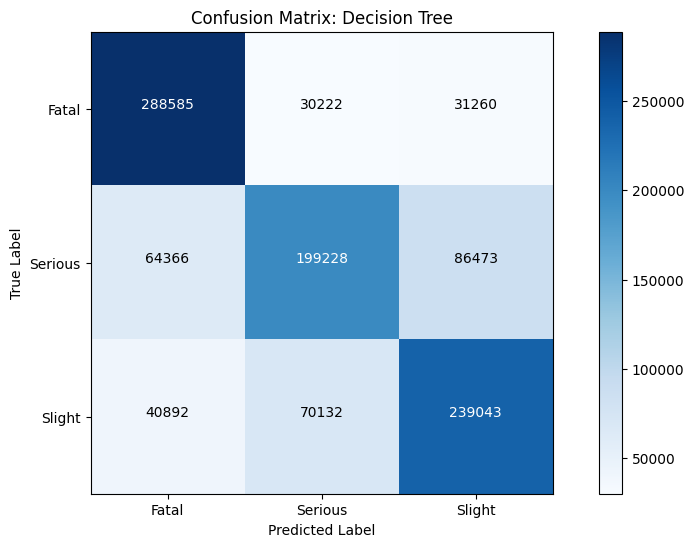

In [17]:
from sklearn.metrics import classification_report,plot_confusion_matrix,balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, plot_tree
# Decision Tree 
# Decision Tree Classification
dt_cla = DecisionTreeClassifier(random_state=30,splitter='random',max_depth=20)

dt_cla.fit(x_train_cla, y_train_cla)

print("Train:", dt_cla.score(x_train_cla, y_train_cla))
print("Test:", dt_cla.score(x_test_cla, y_test_cla))
dt_cla_train = dt_cla.predict(x_train_cla)
dt_cla_predictions = dt_cla.predict(x_test_cla)

print(classification_report(y_train_cla, dt_cla_train, target_names=['Fatal', 'Serious','Slight']))
print(classification_report(y_test_cla, dt_cla_predictions, target_names=['Fatal', 'Serious','Slight']))

# Confusion matrix and Classification report
plot_cf(y_test_cla, dt_cla_predictions, model_name='Decision Tree', class_names=['Fatal', 'Serious','Slight'])